In [55]:
import pandas as pd
import spacy
# nlp = spacy.load("nl_core_news_sm")
from tqdm.notebook import tqdm
from wordfreq import word_frequency, top_n_list

In [19]:
df = pd.read_csv('../output/corpus.csv')

In [50]:
#df.set_index('words', inplace=True)

#df[[df.columns[1]]]
df.iloc[:,1]
#for index, row in df[:10].iterrows():
#    for colname, count in row.items():
#        print(index, colname, count)

words
fase           6.0
richten        4.0
enorm          6.0
virologisch    0.0
alsook         0.0
              ... 
brandweer      0.0
kim            0.0
ahmed          0.0
7,1            0.0
verblijf       0.0
Name: 2020-09-18, Length: 7944, dtype: float64

In [142]:
def process_text(text, remove_stopwords=True):
    return [token.lemma_ for token in nlp(text) if not ((remove_stopwords and token.is_stop) or token.is_punct or token.is_space)]

nr_of_words = [100, 250, 500, 1000, 2500, 5000]
freqworddict = {str(k): [] for k in nr_of_words}

for number in tqdm(freqworddict.keys(), total=len(freqworddict)):
    freqworddict[number] = process_text(' '.join(top_n_list('nl', int(number))), remove_stopwords=True)
    print(len(freqworddict[number]))

conferenceworddict = {k: {} for k in df.columns}
for column in tqdm(df.columns, total=len(df.columns)):
    conference_words = df.loc[:, column]
    conferenceworddict[column]['totalwords'] = conference_words.sum()
    for number in freqworddict:    
        conferenceworddict[column][f'basicwords{number}'] = 0 

        for word, count in conference_words.iteritems():
            if word in freqworddict[number]:
                conferenceworddict[column][f'basicwords{number}'] += count

  0%|          | 0/6 [00:00<?, ?it/s]

15
106
303
776
2238
4715


  0%|          | 0/29 [00:00<?, ?it/s]

In [117]:
import numpy as np
conference_words = df.iloc[:, 1]
#conference_words.count(!)
np.count_nonzero(conference_words)
conference_words.sum()

3968.0

In [149]:
l3 = conferenceworddict['2020-09-01'].keys()
l3 = [x for x in l3 if 'basicwords' in x]
l3

['basicwords100',
 'basicwords250',
 'basicwords500',
 'basicwords1000',
 'basicwords2500',
 'basicwords5000']

In [150]:
l3[1][10:]

'250'

In [165]:
from pprint import pprint
l = [l3]
# Zonder Stopwoorden
for conference in conferenceworddict:
    l2 = []
    for key in l3:
        conferenceworddict[conference][f'percentage_{key[10:]}'] = float(format(round(conferenceworddict[conference][key] / conferenceworddict[conference]['totalwords'], 2), '.2f'))
        l2.append(conferenceworddict[conference][f'percentage_{key[10:]}'])
    l.append(l2)
#pprint(conferenceworddict)
pprint(l)

[['basicwords100',
  'basicwords250',
  'basicwords500',
  'basicwords1000',
  'basicwords2500',
  'basicwords5000'],
 [0.09, 0.25, 0.4, 0.53, 0.7, 0.77],
 [0.09, 0.27, 0.4, 0.55, 0.72, 0.79],
 [0.1, 0.28, 0.4, 0.54, 0.71, 0.8],
 [0.09, 0.27, 0.4, 0.52, 0.68, 0.78],
 [0.09, 0.26, 0.39, 0.51, 0.68, 0.77],
 [0.11, 0.32, 0.46, 0.58, 0.71, 0.81],
 [0.08, 0.28, 0.42, 0.55, 0.69, 0.78],
 [0.09, 0.28, 0.41, 0.54, 0.69, 0.79],
 [0.08, 0.26, 0.39, 0.52, 0.69, 0.79],
 [0.08, 0.27, 0.39, 0.52, 0.68, 0.77],
 [0.08, 0.26, 0.4, 0.52, 0.69, 0.78],
 [0.09, 0.26, 0.39, 0.53, 0.7, 0.78],
 [0.09, 0.29, 0.41, 0.54, 0.7, 0.78],
 [0.08, 0.26, 0.4, 0.53, 0.67, 0.76],
 [0.08, 0.26, 0.39, 0.53, 0.68, 0.75],
 [0.09, 0.26, 0.39, 0.53, 0.68, 0.76],
 [0.09, 0.29, 0.42, 0.55, 0.7, 0.77],
 [0.1, 0.27, 0.4, 0.55, 0.7, 0.77],
 [0.1, 0.28, 0.39, 0.54, 0.69, 0.78],
 [0.1, 0.28, 0.39, 0.53, 0.68, 0.76],
 [0.09, 0.29, 0.41, 0.56, 0.7, 0.78],
 [0.09, 0.27, 0.4, 0.54, 0.69, 0.77],
 [0.09, 0.28, 0.41, 0.55, 0.71, 0.78],
 [0.

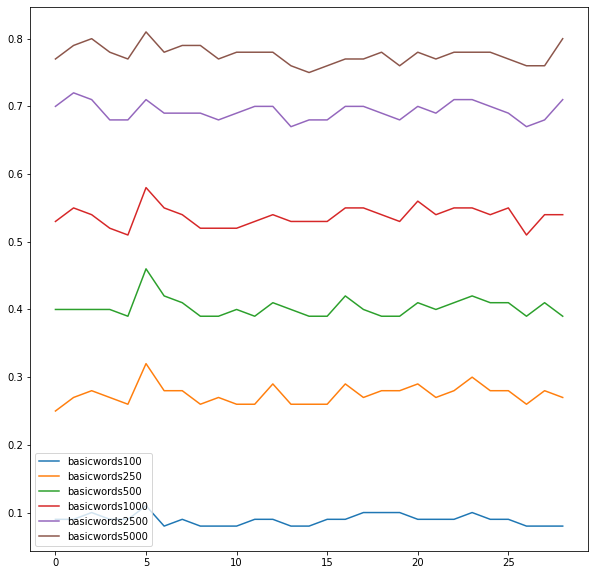

In [169]:
df2 = pd.DataFrame(data=l[1:], columns=l[0])
#lines = df2.plot.line()
df2.plot.line(figsize=(10,10));